# Real-world data

The section reports the performances that are obtained on real-world data using model selection procedures. The dataset is the same as in [Chapter 3, Section 5](Baseline_FDS_RealWorldData). We first report the training performance versus test performance for decision trees. We then compare the gains of performances that can be obtained with prequential validation, for decision trees, logistic regression, random forests and boosting trees.  


In [100]:
# Initialization: Load shared functions and simulated data 

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py
#%run ../Chapter_References/shared_functions.ipynb

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed
        

## Training performance versus test performance

In [Section 2.1 of this chapter](Training_Vs_Test_Performances), we illustrated the overfitting phenomenon with decision trees by comparing the training and test performances when the maximum tree depth is increased. We ran the same experiments on real-world data, and saved the resulting performance DataFrame as a Pickle file in  `performances_train_test_real_world_data.pkl`. Let us first load the file. 


In [6]:
filehandler = open('images/performances_train_test_real_world_data.pkl', 'rb') 
performances_df = pickle.load(filehandler)

The DataFrame contains the same information as in [Section 2.1](Training_Vs_Test_Performances), for the real-world transaction data.

In [7]:
performances_df

,AUC ROC Test,Average precision Test,Card Precision@100 Test,AUC ROC Train,Average precision Train,Card Precision@100 Train,Execution time,Parameters summary
0,0.626,0.024,0.077,0.639,0.063,0.147,19.533309,2
1,0.715,0.032,0.134,0.736,0.094,0.233,22.060830,3
2,0.755,0.037,0.149,0.792,0.121,0.251,24.506536,4
3,0.791,0.045,0.187,0.815,0.154,0.317,27.029386,5
4,0.812,0.049,0.196,0.847,0.184,0.351,29.506857,6
5,0.826,0.029,0.114,0.868,0.213,0.414,32.073183,7
6,0.838,0.020,0.070,0.886,0.244,0.467,34.493712,8
7,0.831,0.020,0.049,0.895,0.282,0.500,37.152258,9
8,0.831,0.018,0.056,0.907,0.322,0.566,39.713055,10
9,0.520,0.008,0.014,0.973,0.758,0.983,63.055570,20


Let us plot the performances in terms of AUC ROC, Average Precision, and CP@100, using the `get_performances_plots` function.

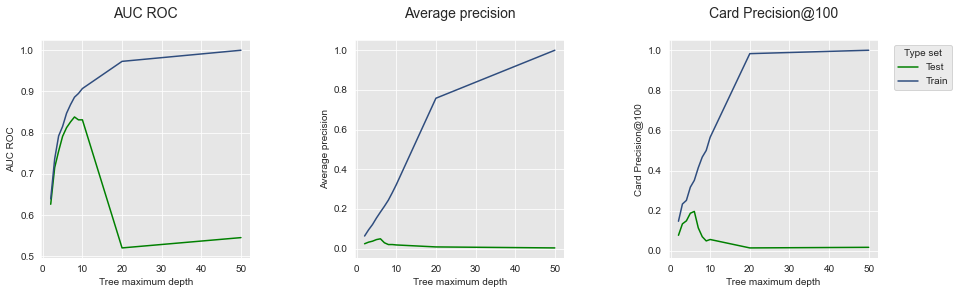

In [8]:
get_performances_plots(performances_df, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Train'],expe_type_color_list=['#008000','#2F4D7E'])

We observe that the results are qualitatively very similar to [those obtained on simulated data](Training_Vs_Test_Performances). The overfitting phenomenon is clearly present: As the tree depth increases, so does the performance for all metrics (blue lines), reaching optimal performances for a tree depth of 50. The test performance however peaks for a tree depth between 5 and 10, and then decreases for higher values of the parameter.

Thanks to the reproducibility of experiments, we note that the performances obtained for a tree depth of 2 and 50 match those reported in [Chapter 3](Chapter3_BaselineWL). 

## Model performances per model class

Let us explore more extensively how model selection improves performances using prequential validation on real-world data. We report in the following the results for the four classes of models, following the same experimental setup than in the [previous section](Model_Selection). The results are available in the `performances_model_selection_real_world_data.pkl` Pickle file. Let us first load the file.

In [14]:
filehandler = open('images/performances_model_selection_real_world_data.pkl', 'rb') 
(performances_df_dictionary, execution_times) = pickle.load(filehandler)

The results are in the same format as in the [previous section](Model_Selection). The performances are summarized as a dictionary in the `performances_df_dictionary`, where keys correspond to models.


In [102]:
performances_df_dictionary.keys()

dict_keys(['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression'])

The execution times for each models are stored in the `execution_times` list.

In [103]:
execution_times

[1617.0470759868622,
 694.7196891307831,
 3615.5994658470154,
 8788.51293516159,
 5527.099639177322]

(Model_Selection_RWD_Decision_Trees)=
### Decision trees
 
The validation and test performances as a function of tree depth are reported below, together with the summary of optimal parameters and performances.

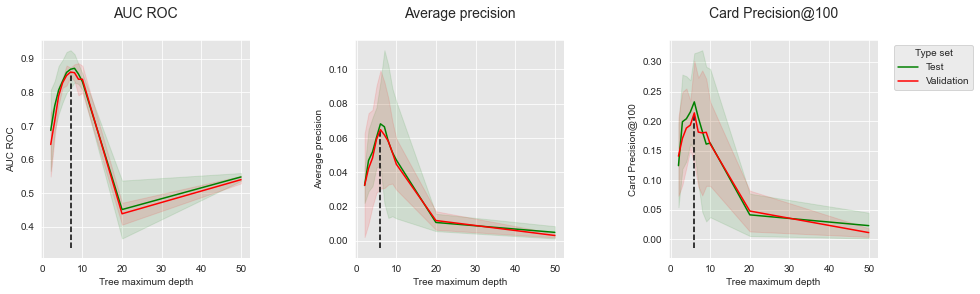

In [13]:
performances_df_dt=performances_df_dictionary['Decision Tree']
summary_performances_dt=get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_dt, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       summary_performances=summary_performances_dt)

In [12]:
summary_performances_dt

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,7,6,6
Validation performance,0.861+/-0.01,0.065+/-0.02,0.214+/-0.04
Test performance,0.869+/-0.03,0.068+/-0.01,0.232+/-0.04
Optimal parameter(s),8,6,6
Optimal test performance,0.872+/-0.02,0.068+/-0.01,0.232+/-0.04


Similar to the simulated dataset results, the validation peformances provide good estimates of the test performances. The optimal tree depth, between 6 and 9 depending on the performance metric, is higher than with the simulated data. This can be explained by the more complex relationships between input features and fraud label in the real-world dataset. 

(Model_Selection_RWD_Logistic_Regression)=
### Logistic regression
 
The validation and test performances as a function of the regulization value are reported below, together with the summary of optimal parameters and performances.

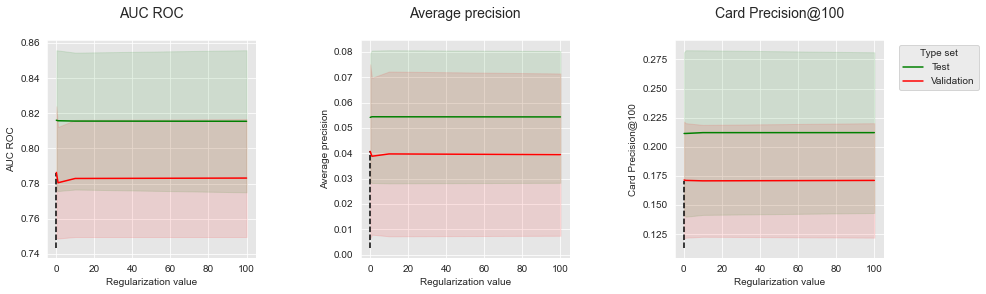

In [107]:
performances_df_lr=performances_df_dictionary['Logistic Regression']
summary_performances_lr=get_summary_performances(performances_df_lr, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_lr, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name='Regularization value',
                       summary_performances=summary_performances_lr)

In [105]:
summary_performances_lr

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.1,0.1,0.1
Validation performance,0.786+/-0.02,0.041+/-0.02,0.171+/-0.03
Test performance,0.816+/-0.02,0.054+/-0.01,0.211+/-0.03
Optimal parameter(s),0.1,1.0,10.0
Optimal test performance,0.816+/-0.02,0.054+/-0.01,0.212+/-0.04


Similar to [the simulated dataset](Model_Selection_Logistic_Regression), the regulization value has little influence on the performances. The performances are stable across the range of tested regularization values.

(Model_Selection_RWD_RF)=
### Random forest

Two different parameters are assessed for random forests: The tree depth (`max_depth` parameter), taking values in the set [5,10,20,50], and the number of trees (`n_estimators` parameter), taking values in the set [25,50,100]. Overall, the optimal parameters are a combination of 100 trees with a maximum depth of 10.


In [113]:
performances_df_rf=performances_df_dictionary['Random Forest']
summary_performances_rf=get_summary_performances(performances_df_rf, parameter_column_name="Parameters summary")
summary_performances_rf

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,25/10,100/10,100/10
Validation performance,0.917+/-0.0,0.093+/-0.02,0.258+/-0.03
Test performance,0.912+/-0.02,0.08+/-0.03,0.227+/-0.05
Optimal parameter(s),100/10,100/10,50/5
Optimal test performance,0.912+/-0.02,0.08+/-0.03,0.227+/-0.04


For better visualization, we follow the same approach as with the [simulated dataset](Model_Selection_Random_Forest). Let us first report the performances as a function of the tree depth, for a fixed number of 100 trees.


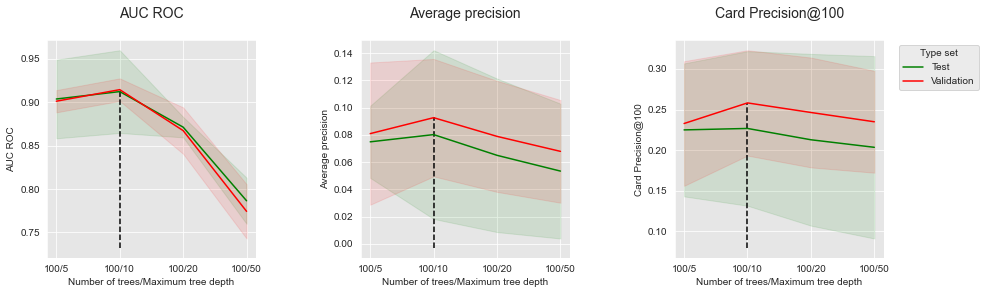

In [111]:


performances_df_rf_fixed_number_of_trees=performances_df_rf[performances_df_rf["Parameters summary"].str.startswith("100")]

summary_performances_fixed_number_of_trees=get_summary_performances(performances_df_rf_fixed_number_of_trees, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_rf_fixed_number_of_trees, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Number of trees/Maximum tree depth",
                       summary_performances=summary_performances_fixed_number_of_trees)

Similar to the [simulated dataset](Model_Selection_Random_Forest), the peformances first increase with the tree depth, before reaching an optimum and decreasing. The optimal tree depth is found around 10.

Let us then report the performances as a function of the number of trees, for a fixed depth of 10.

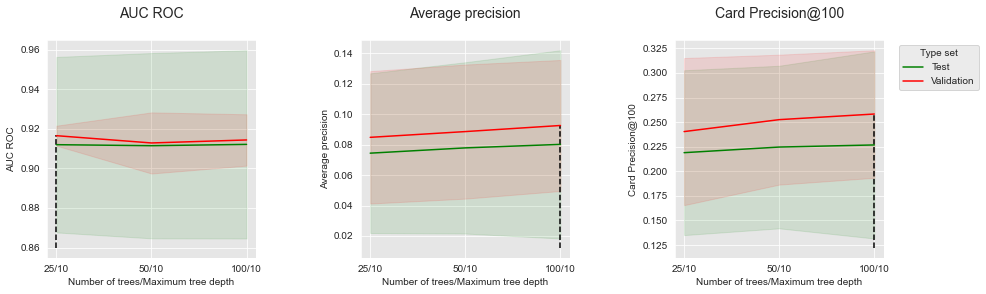

In [114]:
performances_df_rf_fixed_max_tree_depth=performances_df_rf[performances_df_rf["Parameters summary"].str.endswith("10")]

summary_performances_fixed_max_tree_depth=get_summary_performances(performances_df_rf_fixed_max_tree_depth, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_rf_fixed_max_tree_depth, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Number of trees/Maximum tree depth",
                       summary_performances=summary_performances_fixed_max_tree_depth)

Increasing the number of trees allows to slighlty increase the Average Precicision and the CP@100. It however has little influence on the AUC ROC, for which 25 trees already provide optimal performances.  

(Model_Selection_RWD_XGBoost)=
### XGBoost

Three different parameters are assessed for boosting: The tree depth (`max_depth` parameter) taking values in the set [3,6,9], the number of trees (`n_estimators` parameter) taking values in the set [25,50,100] and the learning rate (`learning_rate` parameter) taking values in the set [0.1, 0.3]. The optimal parameters are a combination of 100 trees with a maximum depth of 6, and a learning rate of 0.1, except for the CP@100 where 50 trees provide the best performance. 


In [140]:
performances_df_xgboost=performances_df_dictionary['XGBoost']
summary_performances_xgboost=get_summary_performances(performances_df_xgboost, parameter_column_name="Parameters summary")
summary_performances_xgboost

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,100/0.1/6,100/0.1/6,100/0.1/6
Validation performance,0.924+/-0.01,0.102+/-0.02,0.261+/-0.02
Test performance,0.928+/-0.01,0.095+/-0.03,0.235+/-0.07
Optimal parameter(s),100/0.1/6,100/0.1/6,50/0.1/6
Optimal test performance,0.928+/-0.01,0.095+/-0.03,0.249+/-0.04


For better visualization, we follow the same approach as with the [simulated dataset](Model_Selection_XGBoost). Let us first report the performances as a function of the tree depth, for a fixed number of 100 trees and a learning rate of 0.1.

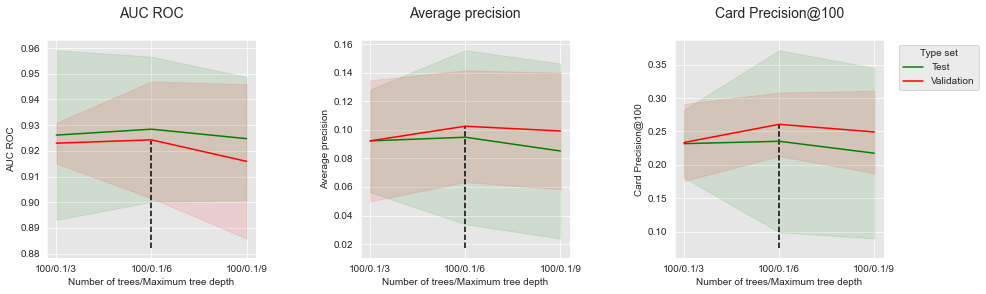

In [141]:
performances_df_xgboost_fixed_number_of_trees=performances_df_xgboost[performances_df_xgboost["Parameters summary"].str.startswith("100/0.1")]

summary_performances_fixed_number_of_trees=get_summary_performances(performances_df_xgboost_fixed_number_of_trees, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_xgboost_fixed_number_of_trees, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Number of trees/Maximum tree depth",
                       summary_performances=summary_performances_fixed_number_of_trees)

Similar to the [simulated dataset](Model_Selection_XGBoost), the peformances first increase with the tree depth, before reaching an optimum and decreasing. The optimal tree depth is found around 6.

Let us then report the performances as a function of the number of trees, for a fixed depth of 6 and a learning rate 0.1.

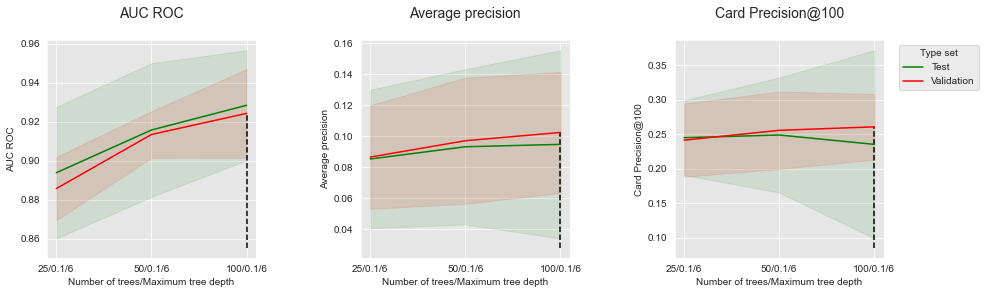

In [142]:
performances_df_xgboost_fixed_max_tree_depth=performances_df_xgboost[performances_df_xgboost["Parameters summary"].str.endswith("0.1/6")]

summary_performances_fixed_max_tree_depth=get_summary_performances(performances_df_xgboost_fixed_max_tree_depth, parameter_column_name="Parameters summary")

get_performances_plots(performances_df_xgboost_fixed_max_tree_depth, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Number of trees/Maximum tree depth",
                       summary_performances=summary_performances_fixed_max_tree_depth)

Increasing the number of trees allows to increase the AUC ROC and the Average Precicision. We however note that for the CP@100, a decrease of performance occurs after 50 trees for the test set.  

(Model_Selection_RWD_Comparison)=
## Comparison of model performances: Summary

Let us finally compare the performances of the different classes of models. Similar to [the simulated dataset](Model_Selection_Comparison_Performances), we plot the performances for the four model classes and for each performance metric as bar charts using the `get_model_selection_performances_plots` function.


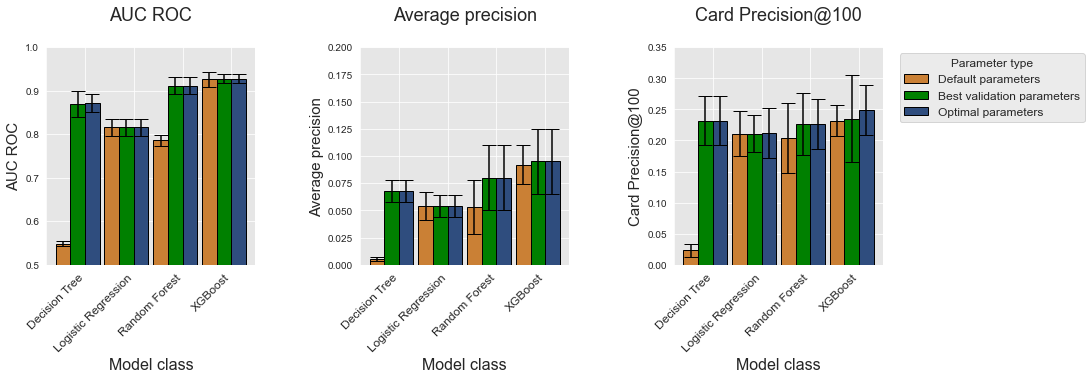

In [143]:
get_model_selection_performances_plots(performances_df_dictionary, 
                                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'],
                                       ylim_list=[[0.5,1],[0,0.2],[0,0.35]],
                                       model_classes=['Decision Tree', 
                                                      'Logistic Regression', 
                                                      'Random Forest', 
                                                      'XGBoost'])
    

As for the simulated data, XGBoost is the model class that provides the best performances for the three metrics (Optimal parameters, represented with blue bars). It is however worth noting that for CP@100, the XGboost optimal parameters are actually not found by the model selection procedure, resulting in lower performances. The actual performances in terms of CP@100 are slightly better than random forests, and on par with decision trees.

This is a result worth considering: Thanks to model selection, the decision tree model is actually as performant than XGBoost, and more performant than random forests in terms of CP@100. The execution times for decision trees are however much lower than those of random forests and XGBoost, as is reported below.



In [144]:
%%capture

fig_model_selection_execution_times_for_each_model_class, ax = plt.subplots(1, 1, figsize=(5,4))

model_classes=['Decision Tree','Logistic Regression','Random Forest','XGBoost']
    
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(model_classes))
    
# Create execution times bars
ax.bar(r1, execution_times[0:4], 
        width = barWidth, color = 'black', edgecolor = 'black', 
        capsize=7)

ax.set_xticks(r1+barWidth/2)
ax.set_xticklabels(model_classes, rotation = 45, ha="right", fontsize=12)
ax.set_title('Model selection execution times \n for different model classes', fontsize=18)
ax.set_xlabel("Model class", fontsize=16)
ax.set_ylabel("Execution times (s)", fontsize=15)


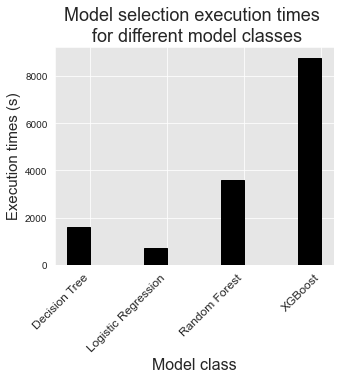

In [145]:
fig_model_selection_execution_times_for_each_model_class

It should be kept in mind that experiments were run on a 40 core server, with parallel computing enabled for random forests and XGBoost. Therefore, the model selection procedure for decision trees is in fact one to two order of magnitude faster than for random forests and XGBoost.

As a final remark, we note that logistic regression models were the fastest to train, but also provided the worst performances for all metrics. 